> **`(!)`** 2021 Written by Giovanni Squillero <[squillero@polito.it](squillero@polito.it)> — **Not intended for sharing**  
> Dissemination or reproduction is forbidden and may result in civil charges and criminal penalties

In [1]:
import os
import numpy as np
from sklearn import preprocessing, decomposition, cluster, metrics
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
import logging
logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S')
logging.getLogger().setLevel(level=logging.INFO)

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

# Spettrometria

In [4]:
#FILENAME = 'tset_H10_slip_noslip.csv'
FILENAME = '2021_05_21_tset_new_ref_H10_2.csv'
file_name = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'Dati AROL', 'Esempi per analisi dei dati', 'Spettrometria', FILENAME))

In [5]:
data = pd.read_csv(file_name)
label = np.array(data.Name)
label.shape = (-1, 1)
encoder = preprocessing.OrdinalEncoder()
label_numeric = encoder.fit_transform(label).astype(int)
X = data.iloc[:,:-2].values.astype(float)
palette_arol = {l:c for l, c in zip(data.Name, data.Color)}
for n, c in enumerate(list(palette_arol)):
    palette_arol[n] = palette_arol[c]
palette_arol[-1] = 'red'

## Unsupervised dimensionality reduction: PCA vs. Feature agglomeration

<AxesSubplot:xlabel='x', ylabel='y'>

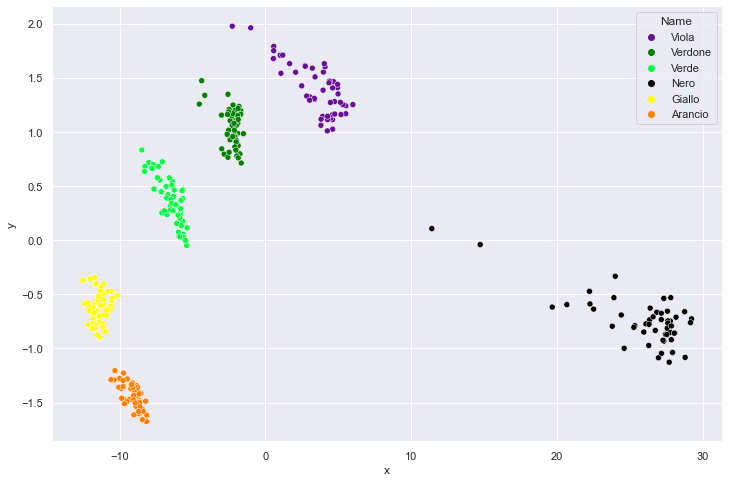

In [6]:
X_pca = decomposition.PCA(n_components=2).fit_transform(preprocessing.StandardScaler().fit_transform(X))
pca = pd.DataFrame(X_pca, columns=['x', 'y'])
pca['label'] = label_numeric
sns.set(rc={"figure.figsize":(12, 8)})
sns.scatterplot(data=pca, x='x', y='y', hue=data.Name, palette=palette_arol)

<AxesSubplot:xlabel='x', ylabel='y'>

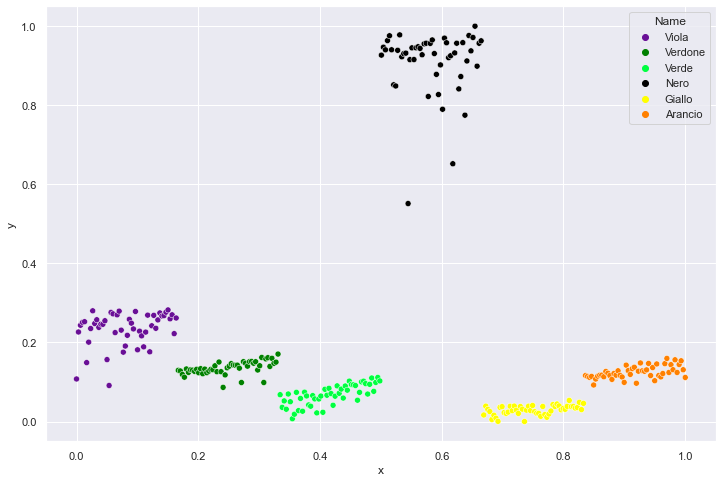

In [7]:
X_pca2 = preprocessing.MinMaxScaler().fit_transform(decomposition.PCA(n_components=2).fit_transform(X))
pca2 = pd.DataFrame(X_pca2, columns=['x', 'y'])
pca2['label'] = label_numeric
sns.set(rc={"figure.figsize":(12, 8)})
sns.scatterplot(data=pca2, x='x', y='y', hue=data.Name, palette=palette_arol)

<AxesSubplot:xlabel='x', ylabel='y'>

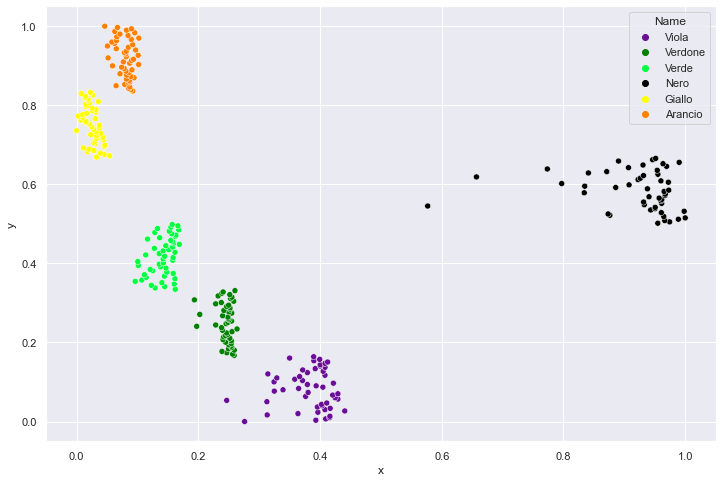

In [8]:
X_fa = preprocessing.MinMaxScaler().fit_transform(cluster.FeatureAgglomeration(n_clusters=2).fit_transform(X))
fa = pd.DataFrame(X_fa, columns=['x', 'y'])
fa['label'] = label_numeric
sns.set(rc={"figure.figsize":(12, 8)})
sns.scatterplot(data=fa, x='x', y='y', hue=data.Name, palette=palette_arol)

## Select best view

In [9]:
df = pca2

## Clustering (KMeans)

Text(0.5, 1.0, 'Average Silhouette score: 0.564633187546812')

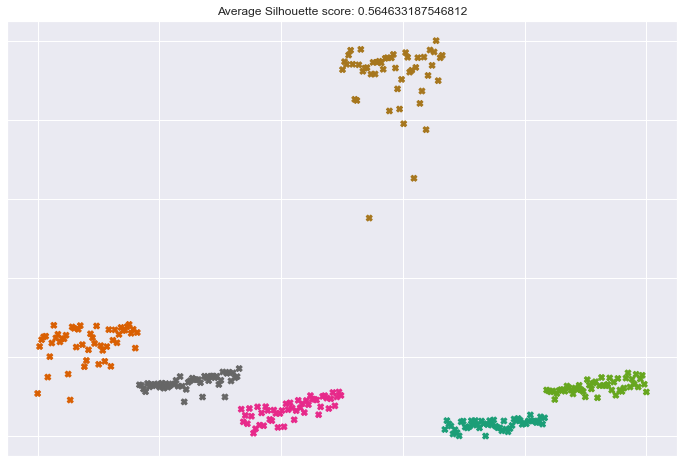

In [10]:
#X_scaled = preprocessing.StandardScaler().fit_transform(X)
X_scaled = preprocessing.MinMaxScaler().fit_transform(decomposition.PCA(n_components=5).fit_transform(X))
X_scaled = decomposition.PCA(n_components=5).fit_transform(X)

NUM_CLUSTERS = 6
df['kmeans'] = cluster.KMeans(n_clusters=NUM_CLUSTERS, n_init=100).fit_predict(X_scaled)
fig, ax = plt.subplots()
ax.scatter(df.x, df.y, marker='X', c=df.kmeans, cmap='Dark2')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(True)
silhouette_avg = metrics.silhouette_score(X, df.kmeans)
ax.set_title(f'Average Silhouette score: {silhouette_avg}')

## Clustering (DBSCAN)

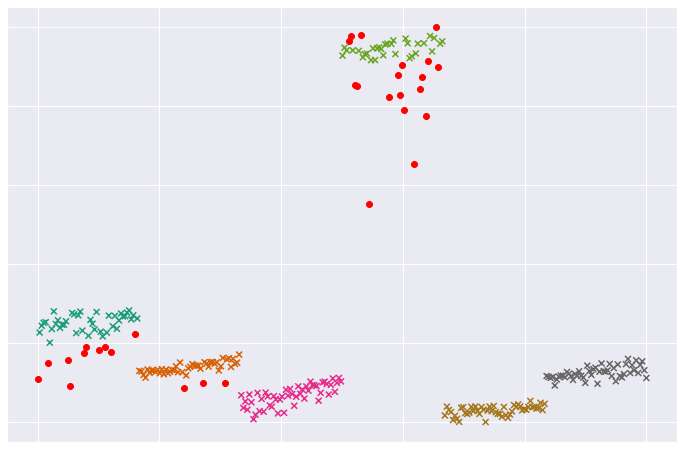

In [11]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)
dbscan = cluster.DBSCAN(eps=.7, min_samples=5, algorithm='auto', leaf_size=30)
df['dbscan'] = dbscan.fit_predict(X_scaled)

fig, ax = plt.subplots()
clustered = df[df.dbscan >= 0]
outliers = df[df.dbscan == -1]
ax.scatter(outliers.x, outliers.y, c='red', marker='o')
ax.scatter(clustered.x, clustered.y, marker='x', c=clustered.dbscan, cmap='Dark2')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(True)
#silhouette_avg = metrics.silhouette_score(X, df.dbscan)
#ax.set_title(f'Average Silhouette score: {silhouette_avg}')

## Clustering (MeanShift)

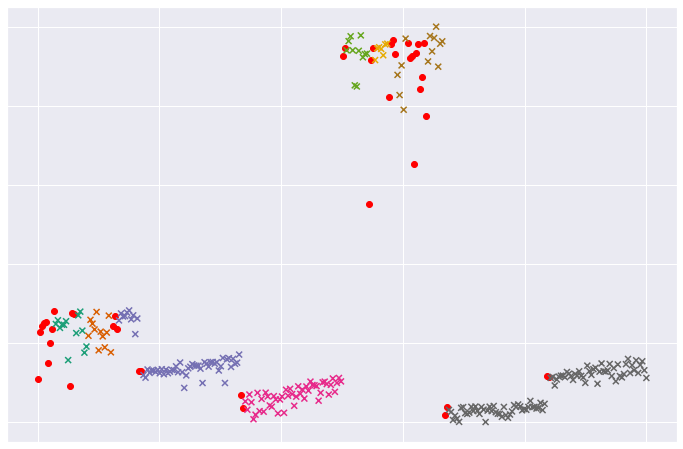

In [12]:
X_scaled = decomposition.PCA(n_components=2).fit_transform(X)

df['optics'] = cluster.OPTICS().fit_predict(X_scaled)

fig, ax = plt.subplots()
clustered = df[df.optics >= 0]
outliers = df[df.optics == -1]
ax.scatter(outliers.x, outliers.y, c='red', marker='o')
#ax.scatter(clustered.x, clustered.y, marker='x', c=[palette_arol[c] for c in clustered.optics])
ax.scatter(clustered.x, clustered.y, marker='x', c=clustered.optics, cmap='Dark2')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(True)
#silhouette_avg = metrics.silhouette_score(X, df.optics)
#ax.set_title(f'Average Silhouette score: {silhouette_avg}')